**Step 6 - Model Selection**
- Identify Model Families

**Step 7 - Train the Model**
- Splitting the data
- Feature Engineering
- Training the Model
- Hyperparameter Tuning
- Model Validation
- Model Refinement
- Saving the Model

**Step 8 - Evaluate the Model**
- Choose Evaluation Metrics
- Evaluate the Model
- Repeat the Process ( Step 7 and 8 )

*Step 9 - Deploy the Model*
- *Choose a Deployment Environment*
- *Model Conversion*
- *Model Integration*
- *Testing*
- *Monitoring*
- *Maintenance*
    
**Step 10 - Communicate Results**
- Identify the Audience
- Choose the Right Format
- Visualize the Results
- Explain the Methodology
- Highlight the Insights
- Provide Recommendations
- Collect Feedback

In [19]:
def Model_logistic(X_train, y_train, X_test, y_test, hp, grid_search=False):
    
    if grid_search:
        log = LogisticRegression()

        log_cv = GridSearchCV(log, hp, cv=10)
        
        log_cv.fit(X_train, y_train)
        
        predictions = log_cv.predict(X_test)
        
        hp = log_cv.best_params_
        
    else:
        log = LogisticRegression(**hp)

        log.fit(X_train, y_train)

        predictions = log.predict(X_test)

    accuracy = accuracy_score(y_test, predictions, normalize=True)
    precision = precision_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)
    dic = {'model': 'Logistic', 'accuracy': accuracy, 'precision': precision, 'f1': f1, 'hp': json.dumps(hp)}
    return cm, dic

In [20]:
def Model_knn(X_train, y_train, X_test, y_test, hp, grid_search=False):
    
    if grid_search:
        knn = KNeighborsClassifier()

        knn_cv = GridSearchCV(knn, hp, cv=10)
        
        knn_cv.fit(X_train, y_train)
        
        predictions = knn_cv.predict(X_test)
        
        hp = knn_cv.best_params_
        
    else:
    
        knn = KNeighborsClassifier(**hp)

        knn.fit(X_train, y_train)

        predictions = knn.predict(X_test)

    accuracy = accuracy_score(y_test, predictions, normalize=True)
    precision = precision_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)
    cr = classification_report(y_test, predictions)
    dic = {'model': 'KNN', 'accuracy': accuracy, 'precision': precision, 'f1': f1, 'hp': json.dumps(hp)}
    return cr, cm, dic

In [21]:
def decision_tree(X_train, y_train, X_test, y_test, hp, grid_search=False):
    
    if grid_search:
        tree = DecisionTreeClassifier()

        tree_cv = GridSearchCV(tree, hp, cv=10)
        
        tree_cv.fit(X_train, y_train)
        
        predictions = tree_cv.predict(X_test)
        
        hp = tree_cv.best_params_
        
        tree = DecisionTreeClassifier(**hp)

        tree.fit(X_train, y_train)

        predictions = tree.predict(X_test)
        
        importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(tree.feature_importances_,3)})
        
    else:
    
        tree = DecisionTreeClassifier(**hp)

        tree.fit(X_train, y_train)

        predictions = tree.predict(X_test)
        
        importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(tree.feature_importances_,3)})
        

    accuracy = accuracy_score(y_test, predictions, normalize=True)
    precision = precision_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    cm = confusion_matrix(y_test, predictions)
    cr = classification_report(y_test, predictions)
    dic = {'model': 'Decision Tree', 'accuracy': accuracy, 'precision': precision, 'f1': f1, 'hp': json.dumps(hp)}
    return tree, cr, importances, cm, dic

In [22]:
def Model_random_forest(X_train, y_train, X_test, y_test, hp, grid_search=False):
    
    if grid_search:
        rfc = RandomForestClassifier()

        rfc_cv = GridSearchCV(rfc, hp, cv=10)
        
        rfc_cv.fit(X_train, y_train)
        
        predictions = rfc_cv.predict(X_test)
        
        hp = rfc_cv.best_params_
        
        rfc = RandomForestClassifier(**hp)

        rfc.fit(X_train, y_train)

        predictions = rfc.predict(X_test)
        
        importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rfc.feature_importances_,3)})
        
    else:
    
        rfc = RandomForestClassifier(**hp)

        rfc.fit(X_train, y_train)

        predictions = rfc.predict(X_test)
        
        importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rfc.feature_importances_,3)})
        
    accuracy = accuracy_score(y_test, predictions, normalize=True)
    precision = precision_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    cm = confusion_matrix(y_test, predictions)
    cr = classification_report(y_test, predictions)
    dic = {'model': 'Random Forest', 'accuracy': accuracy, 'precision': precision, 'f1': f1, 'hp': json.dumps(hp)}
    return cr, importances, cm, dic

In [9]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('Pathrise_preprocessed.csv')

## Step 6 - Model Selection

### Identify Model Families



The main goal of this analysis is to derive insights around:

**1- if a fellow will ultimately be placed at a company**

**2- and how long until a placement can be expected.**

in this notebook we are going to handle the first goal

for this goal the **palced** feature is the target


## Step 7 - Train the Model

### Feature Engineering

In [8]:
df_corr = df.corr()

<Axes: >

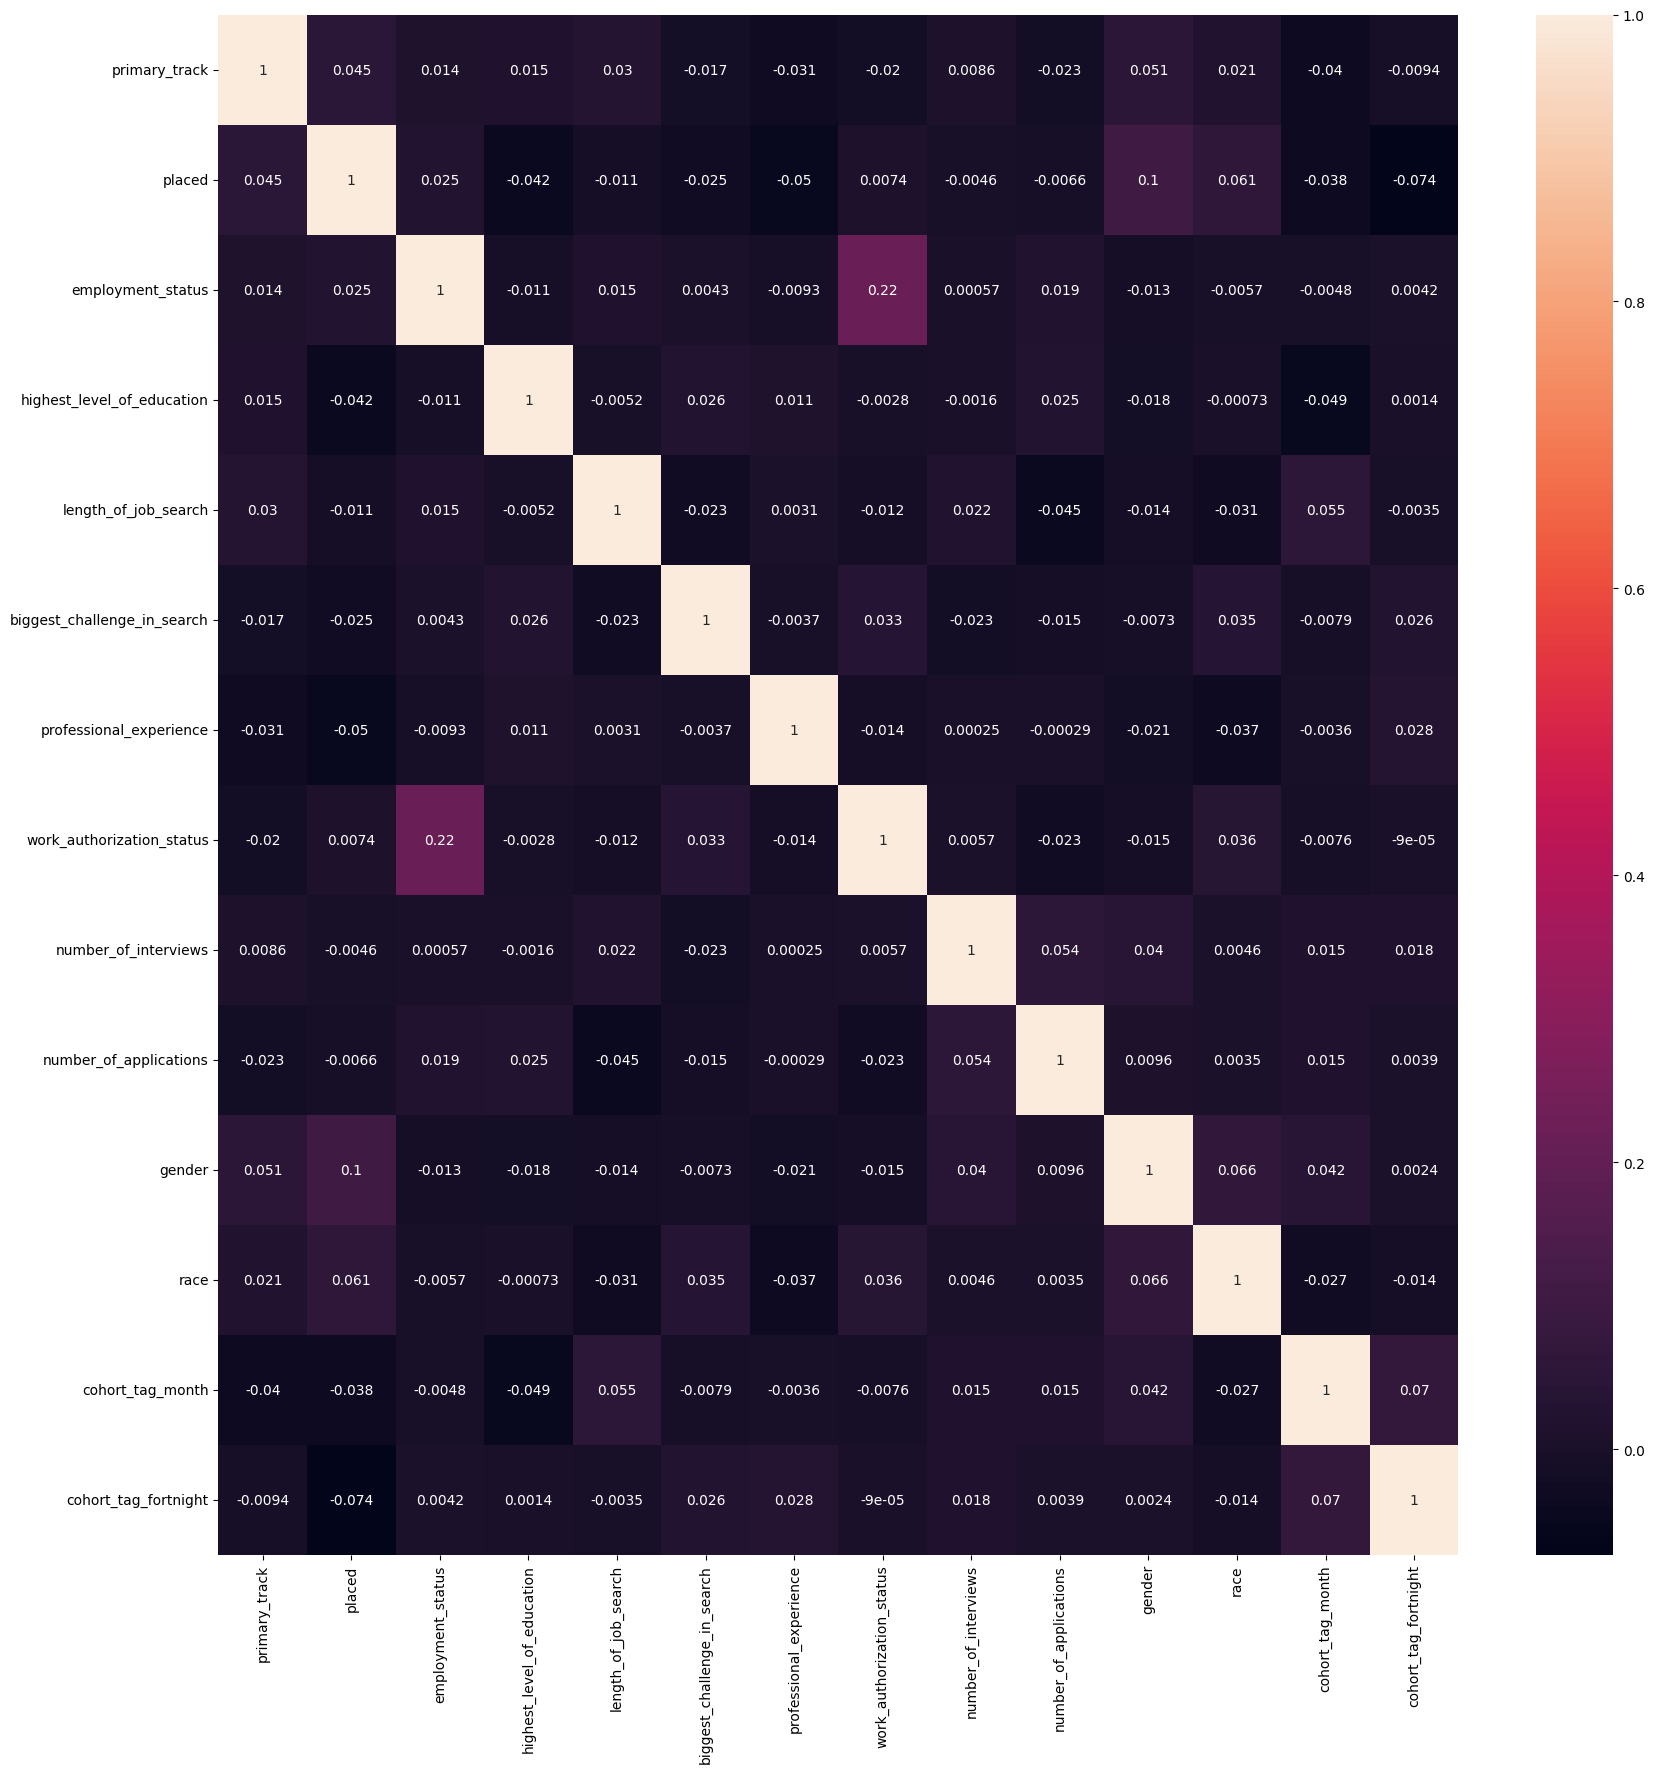

In [11]:
plt.figure(figsize=(20,20), dpi=100)

sns.heatmap(df_corr, annot=True)

### Splitting the data

In [5]:
# Remove the other target
df.drop('program_duration_days', axis=1, inplace=True)

X=df.drop('placed', axis=1)
y=df['placed']

# check for Imbalancment
y.value_counts()


placed
0    1018
1     935
Name: count, dtype: int64

seems OK so Split Dataset to Test and Train

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

### Training the Model

### Hyperparameter Tuning

### Model Validation

### Model Refinement

### Saving the Model

## Step 8 - Evaluate the Model

### Choose Evaluation Metrics

### Evaluate the Model

### Repeat the Process ( Step 7 and 8 )

## Step 9 - Deploy the Model

### Choose a Deployment Environment

### Model Conversion

### Model Integration

### Testing

### Monitoring

### Maintenance

## Step 10 - Communicate Results

### Identify the Audience

### Choose the Right Format

### Visualize the Results

### Explain the Methodology

### Highlight the Insights

### Provide Recommendations

### Collect Feedback